------------------
```markdown
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com
```
------------------------------
❗❗❗ **IMPORTANT**❗❗❗ **Create a copy of this notebook**

In order to work with this Google Colab you need to create a copy of it. Please **DO NOT** provide your answers here. Instead, work on the copy version. To make a copy:

**Click on: File -> save a copy in drive**

Have you successfully created the copy? if yes, there must be a new tab opened in your browser. Now move to the copy and start from there!

----------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import beta, gaussian_kde, norm

# Introduction to Point Estimation
Point estimation is a statistical technique used to estimate an unknown parameter of a population distribution (e.g., mean, variance) using sample data. Given a sample, we use a function (called an estimator) to approximate values like the population mean or variance. A point estimate is a single value that serves as the "best guess" for the parameter.

## Definition
Let $\theta$ be the population parameter, e.g., mean $\mu$, variance $\sigma^2$. Let $\hat{\theta}$ be the point estimate of $\theta$, calculated from sample data. The goal is to find an estimator which finds a $\hat{\theta}$ that is closest to the true value $\theta$.

## Common Point Estimators
There are several famous (and familiar) estimators that we have encountered before. Those are:
- **Sample Mean**: $\bar{X} = \frac{1}{n} \sum_{i=1}^n X_i $ (estimates population mean $\mu$).
- **Sample Variance**: $S^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})^2$(estimates population variance $\sigma^2$).

### Example
Suppose we want to estimate the average height of students in a school. We collect a sample of 50 students and calculate the sample mean $\bar{x}$. This sample mean $\bar{x}$ is a point estimate of the population mean $\mu$

In [ ]:
# Sample data: heights of 50 students (in cm)
pop_mean = 170
po_std = 10
heights = np.random.normal(loc=170, scale=10, size=50)

# Point estimate for population mean
sample_mean = np.mean(heights)
print(f"Point estimate for population mean: {sample_mean:.2f} cm")

### Exercise 1
Generate a sample of 100 observations from a normal distribution with $\mu = 50$ and $\sigma = 5$.
- Calculate the point estimate for the population mean.
- What is the point estimate for the population variance of the same sample?

<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individual may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->

In [ ]:
pop_mean = 50
pop_std = 5
sample_size = 100
sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
sample_mean = np.mean(sample_data)
sample_std_1 =  (1/(len(sample_data)-1)*sum((sample_data-sample_mean)**2))**0.5
sample_std_2 =  (np.var(sample_data, ddof=1))**0.5

print(f"Sample Mean Estimate: {sample_mean:.2f}")
print(f"Sample STD Estimate: {sample_std_1:.2f}")
print(f"Sample STD Estimate: {sample_std_2:.2f}")

Sample Mean Estimate: 49.76
Sample STD Estimate: 4.56
Sample STD Estimate: 4.56


## Properties of a Good Point Estimator
A good point estimator should have the following properties:
1. **Unbiasedness**: The expected value of the estimator equals the population parameter $\mathbb{E}(\hat{\theta})$ = $\theta.$
  - $ \text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta $
1. **Consistency**: As the sample size increases $(n\rightarrow\infty)$, the estimator converges to the true parameter.
1. **Efficiency**: The estimator has the smallest possible variance among all unbiased estimators.

### Example
Let us check first how the sample mean estimation changes with the sample size. Is the estimator biased?

Mean of estimates: 49.98994947175945


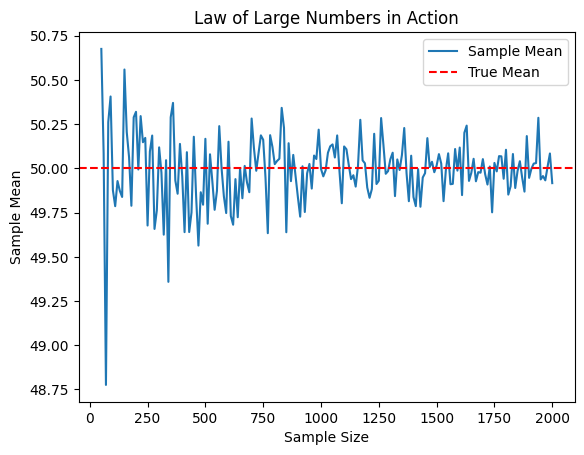

In [ ]:
pop_mean = 50
pop_std = 5
sample_sizes = np.arange(50, 2001, 10)
means = []
for sample_size in sample_sizes:
  sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
  sample_mean = np.mean(sample_data) # 1/len(sample_data)*sum(sample_data)
  means += [sample_mean]

print(f"Mean of estimates: {np.mean(means)}")
plt.plot(sample_sizes, means, label="Sample Mean")
plt.axhline(y=50, color='red', linestyle='dashed', label="True Mean")
plt.xlabel("Sample Size")
plt.ylabel("Sample Mean")
plt.title("Law of Large Numbers in Action")
plt.legend()
plt.show()

### Exercise 2
Assume that the monthly income of population of a country follows a normal distribution with $\mu = 100$ and $\sigma = 5.$ Generate 500 sample data of size 100 each. Calculate the bias of the sample mean and sample variance as estimators of the population mean and variance, respectively. What happens to the bias as the sample size increases? plot your results.

**Hint**: The bias is calculated using:
$$ \text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta $$

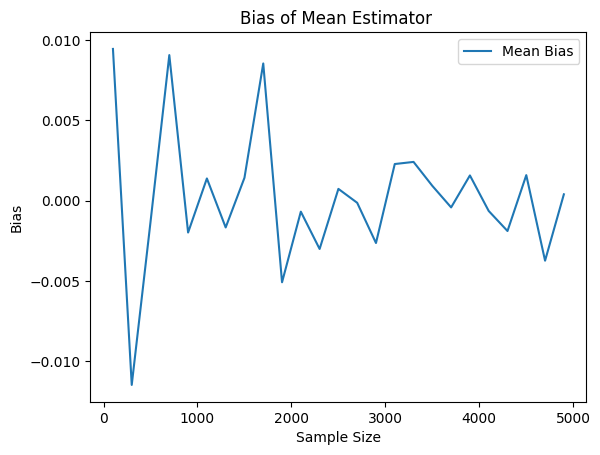

In [ ]:
pop_mean= 100
pop_std = 5
sample_sizes = np.arange(100, 5000, 200)
per_sample_size_iter = 500
mean_biases = []
for sample_size in sample_sizes:
  sample_mean = 0
  for i in range(per_sample_size_iter):
      sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
      sample_mean += np.mean(sample_data)
  mean_biases += [sample_mean/per_sample_size_iter - pop_mean]
mean_biases = np.array(mean_biases)

plt.plot(sample_sizes, mean_biases, label="Mean Bias")
plt.xlabel("Sample Size")
plt.ylabel("Bias")
plt.title("Bias of Mean Estimator ")
plt.legend()
plt.show()

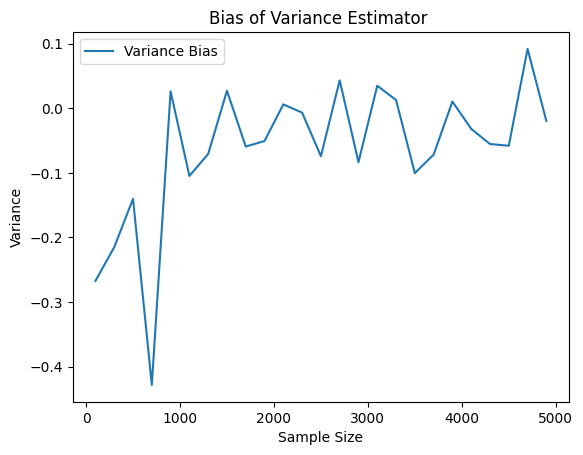

In [ ]:
pop_mean= 100
pop_std = 5
sample_sizes = np.arange(100, 5000, 200)
per_sample_size_iter = 500
var_biases = []
for sample_size in sample_sizes:
  sample_var = 0
  for i in range(per_sample_size_iter):
      sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
      sample_var += np.var(sample_data)
  var_biases += [sample_var/per_sample_size_iter - pop_std**2]
var_biases = np.array(var_biases)

plt.plot(sample_sizes, var_biases, label="Variance Bias")
plt.xlabel("Sample Size")
plt.ylabel("Variance")
plt.title("Bias of Variance Estimator ")
plt.legend()
plt.show()

## Minimum Squared Error (MSE)
Without delving deep into math, we can say that a good estimator is an estimator that minimizes the error between the true value and the estimated value. That is:
$$ \text{MSE}(\hat{\theta}) = \mathbb{E}\left(\left|\theta - \hat{\theta}\right|^2\right)$$
If we follow certain mathematical procedure, we can reach:
$$ \text{MSE}(\hat{\theta}) = \text{Var}(\hat{\theta}) + \text{Bias}(\hat{\theta})^2 $$

$\text{Bias}(\hat{\theta})^2$ measures how far an estimator is from the true parameter on average while $\text{Var}(\hat{\theta})$ measures how much the estimate fluctuates for different samples.

### Example
Estimate the mean and variance of a population with normal distribution ($\mu$ = 100, $\sigma$ = 5) using a sample of size 100.

In [ ]:
# Sample data
pop_mean = 100
pop_std = 5
sample_size = 100
sample_data = np.random.normal(loc=pop_mean, scale=pop_std, size=sample_size)
data = np.random.normal(loc=50, scale=10, size=100)

# Sample mean and variance
sample_mean = np.mean(data)
sample_variance = np.var(data, ddof=1)  # ddof=1 for unbiased estimator

print(f"Sample mean: {sample_mean:.2f}")
print(f"Sample variance: {sample_variance:.2f}")

### Exercise 3
Assume a normal distribution with $\mu = 75$ and $\sigma = 8$. Calculate the sample mean and sample variance. Compare the sample variance with the population variance. Is the sample variance unbiased? Try to visualize your resutls.

In [ ]:
pop_mean= 75
pop_std = 8

# Your code

**Congratulations! You have finished the Notebook! Great Job!**
🤗🙌👍👏💪
<!--
# Copyright © 2024 Meysam Goodarzi
This notebook is licensed under CC BY-NC 4.0 with the following amandments:
- Individuals may use, share, and adapt this material for non-commercial purposes with attribution.
- Institutions/Companies must obtain written consent to use this material, except for nonprofits.
- Commercial use is prohibited without permission.  
Contact: analytica@meysam-goodarzi.com.
-->